**Dataset**
CheXpert chest x-ray dataset.

**Technique**
DenseNet for image classification. DenseNet is an open-source deep learning algorithm with implementations available in Keras (using TensorFlow as a back-end). Class Activation Maps are used to understand model activation and visualize it. DenseNet(Densely Connected Convolutional Networks) is one of the latest neural networks for visual object recognition. It’s quite similar to ResNet but has some fundamental differences.

**Tools and Platforms**
Deep Learning with GPU acceleration 
Cresle or GCP is used as a managed machine learning service for project management, run history and version control, and model deployment.

We use a weakly labelled dataset that was released by Stanford university. The dataset is described in this paper (https://arxiv.org/abs/1901.07031), and you can download it for free. It includes over more than 65,240 unique patients and 224,316 X-ray images with 14 different pathology labels (e.g. atelectasis, pneumonia, etc.) mined from radiology reports using NLP methods such as keyword search and semantic data integration. 

In [1]:
from PIL import Image
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [17]:
#!pip install densenet
#!pip install keras
#sudo pip install git+https://www.github.com/keras-team/keras-contrib.git


In [2]:
#identify images path for future use
PATH = "/Users/My_Drive/Desktop/amliNet/Data"
#load the csv file to load targets
df = pd.read_csv(PATH + "/train.csv")
df = df.sample(1000)

In [3]:
# csv file has different image path, we change to math to our directory

def edit_urls(url):
    pieces = url.split('/')
    newurl=''
    for i, piece in enumerate(pieces):
        if i>0:
            newurl += '/' + piece
        elif i==0:
            newurl += PATH
    return newurl

Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the first image in our dataset and check its size using the ‘shape’ function.

/Users/My_Drive/Desktop/amliNet/Data/train/patient12766/study4/view1_frontal.jpg


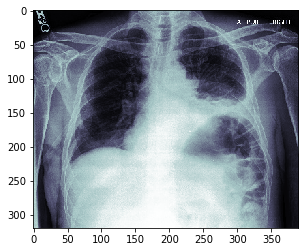

(390, 320)

In [4]:
#testing
tester_url = edit_urls(df.iloc[0]['Path'])
print( tester_url )
xray = Image.open(tester_url)
plt.imshow(xray, cmap="bone")
plt.show()

xray.size

In [5]:
#Change the path for all images
df["Path"] = df["Path"].apply(edit_urls)

Our dataset has a lot of NaN values, that are described as "no finding", we will fill them with zeros. Also, there are "m

In [6]:
#identify what features will be used for model training
outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'
]
#fill missing values with zeros, and assign all unsertain values (-1) to positive (1)
df[outcomes] = df[outcomes].fillna(0)
df[outcomes] = df[outcomes].replace(-1, 1)

In [7]:
#Train/test split
image_train, image_test, label_train, label_test = train_test_split(
   df['Path'], df[outcomes], test_size=0.2, random_state=42)

#Create train and test dataframes
train_df = pd.concat([image_train, label_train], axis=1)
test_df = pd.concat([image_test, label_test], axis=1)

#For the classifier to work, for some reason it has to be in string format
test_df['No Finding'] = test_df['No Finding'].apply(str)
train_df['No Finding'] = train_df['No Finding'].apply(str)

In [8]:
from keras.preprocessing.image import ImageDataGenerator


datagen=ImageDataGenerator(rescale=1./255,
                           samplewise_center=True,
                           samplewise_std_normalization=True,
                           shear_range=0.1,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           height_shift_range= 0.05,
                           width_shift_range=0.1,
                           fill_mode = 'reflect'
                           ) 

train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='Path',
    y_col='No Finding',
    color_mode='grayscale',
    target_size=(256, 256),
    batch_size = 16)

test_generator = datagen.flow_from_dataframe(
    test_df, 
    x_col='Path',
    y_col='No Finding',
    target_size=(256, 256),
    color_mode='grayscale', 
    batch_size=128)

Using TensorFlow backend.


Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. We use the ‘add()’ function to add layers to our model.

In [11]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Dense, Input, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import Sequence
from keras_contrib.applications.densenet import DenseNetImageNet121
from keras.applications.densenet import DenseNet121

In [36]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

#import keras.backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, Callback, ModelCheckpoint
import numpy as np
import pickle
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Model
from keras.utils import multi_gpu_model
from tensorflow.python.client import device_lib
import random
import warnings
from keras.utils import Sequence
import tensorflow as tf
from tensorflow.keras import backend

In [39]:

# base_model = DenseNetImageNet121(input_shape=(256, 256, 1), weights='imagenet', include_top=False)


base_model = DenseNet121(input_shape=(224, 224, 3),
                           
                             include_top=False,
                            )
#dencenet_model = densenet.DenseNet(classes=10, input_shape=(256, 256, 1), depth=40, growth_rate=12, bottleneck=True, reduction=0.5)
#model = densenet.DenseNetImageNet121(input_shape=(256,256,1))

# x = model.output
# x = Dense(100, activation='relu')(x)
# predictions = Dense(14, activation='sigmoid', name="final_classifier")(x)
# model = Model(inputs=model.input, outputs=predictions)

# # adam = Adam(lr=0.0001)
# # model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])



AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
!pip install DenseNet121



In [ ]:
#multi_model.summary()

In [ ]:
#multi_model.load_weights(weight_path)

In [ ]:
multi_model.fit_generator(train_generator,
                    steps_per_epoch=32,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=5)